<b> <font size="+2.5"> Epigenetic Age Acceleration
 </b> </font> <br>

Date: 2024-01-04 <br>
Author: ASF

epigenetic clocks were calculated by Natan Yusupov <br>
see folder Biological_age_estimation; scripts 01_qc_normalization_epic_script.R and <br> 02_calculation_epigenetic_clocks_script.R

# Load libraries

In [1]:
suppressPackageStartupMessages({
library(tidyverse)
library(readr)
library(readxl)
library(vroom)
library(ggpubr)
})

# Load epigenetic clocks

In [2]:
methylation_clocks <- as.data.frame(read_excel("../datasets/Final_df_no_duplicates_selected.xlsx"))
methylation_clocks$Disease_Status <- ifelse(methylation_clocks$Disease_status=='0', 'Controls', 'Cases')
methylation_clocks$Disease_Status <- factor(methylation_clocks$Disease_Status, levels=c('Controls', 'Cases'))
head(methylation_clocks)
dim(methylation_clocks)

,Sample_ID,Sample_Name,DNAmAgeHorvath_norm1,AgeAccelHorvath_norm1_corrected,DNAmAgeCorticalClock_norm2,AgeAccelCorticalClock_norm2_corrected,propNeuron,Sex,Age,Smoking_status,Disease_status,Disease_Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>
1,205038940011_R01C01,s72,64.81244,-2.391745,63.84648,-1.2744344,0.5458883,M,64,Never,1,Cases
2,205038940011_R02C01,s33,60.43214,2.032734,52.33483,-3.1829384,0.5087223,F,51,Never,0,Controls
3,205038940011_R03C01,s32,66.24131,2.859330,65.12888,3.0295574,0.4711049,M,59,Current,1,Cases
4,205038940011_R04C01,s80,56.16586,4.301647,50.00699,-0.8367336,0.4714819,F,45,Never,0,Controls
5,205038940011_R05C01,s92,51.27832,-10.277093,61.57882,-2.4963320,0.5641031,F,61,Current,1,Cases
6,205038940011_R06C01,s44,49.15527,-1.055155,49.96630,1.9709798,0.5002621,M,41,Current,1,Cases


[1] 91 12

In [3]:
# read in summarized meta data (from script 03_Selection_of_covariates)
meta_data <- read_excel('../datasets/summarized_meta_data_anonym_labels.xlsx', col_names = TRUE)
meta_data <- meta_data %>% select(c('Donor', 'Disease_Status', 'Sex', 'Age', 'pH', 'RIN', 'PMI', 'lib_batch', 'PC1')) 
meta_data <- as.data.frame(meta_data)
meta_data$Disease_Status <- factor(meta_data$Disease_Status, levels=c('Controls', 'Cases'))
head(meta_data)

,Donor,Disease_Status,Sex,Age,pH,RIN,PMI,lib_batch,PC1
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,s1,Cases,Male,51,6.62,7.5,18.0,15,-1.377918
2,s2,Cases,Male,64,6.60,7.6,24.0,15,-18.667621
3,s3,Cases,Female,66,6.52,8.1,12.5,10,-4.241909
4,s4,Cases,Male,40,6.20,7.6,21.5,13,-10.519050
5,s5,Cases,Male,55,6.34,6.4,72.0,5,-36.091387
6,s6,Controls,Female,33,6.77,7.7,24.0,13,21.016439


In [4]:
# remove individuals not present in N=87 of single nuclei data set
methylation_clocks <- methylation_clocks[methylation_clocks$Sample_Name %in% meta_data$Donor,]
dim(methylation_clocks)

[1] 86 12

# Correlate chronological with epigenetic age

## Extended Data Fig. 9a,b

In [5]:
# check for normal distribution
# ALL DNAmAge are normally distributed
# ALL AgeAccel are normally distributed

for (var in c('DNAmAgeCorticalClock_norm2', 'DNAmAgeHorvath_norm1', 'AgeAccelCorticalClock_norm2_corrected', 'AgeAccelHorvath_norm1_corrected')){
    tmp_cases <- 
    if(shapiro.test(methylation_clocks[methylation_clocks$Disease_Status == 'Cases',][,var])$`p.value` < 0.05){
        print(var)}
    if(shapiro.test(methylation_clocks[methylation_clocks$Disease_Status == 'Controls',][,var])$`p.value`< 0.05){
        print(var)} 
}

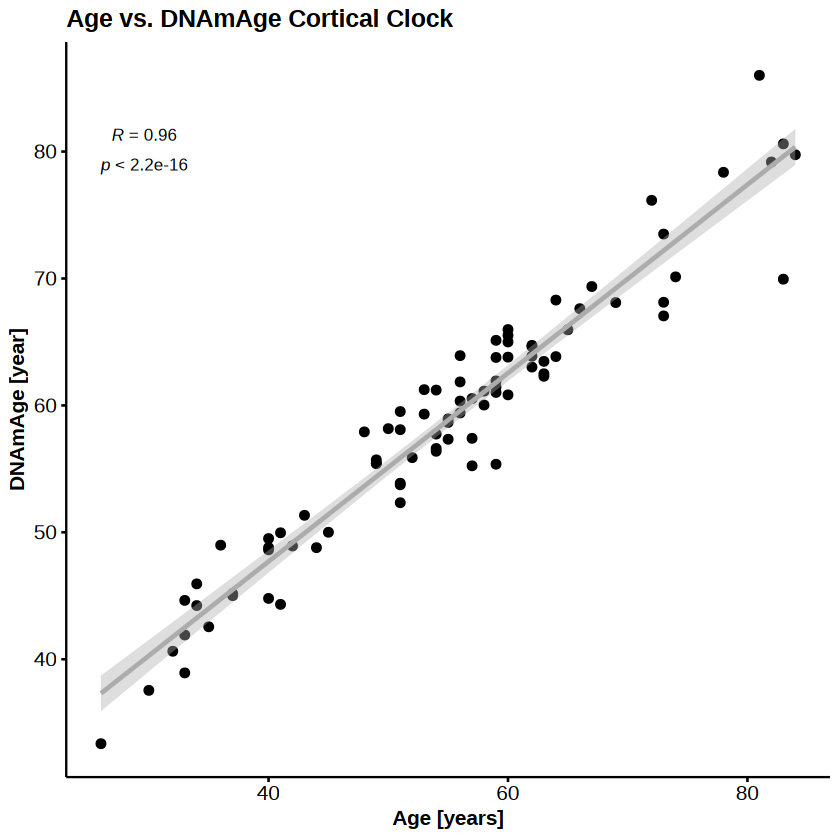

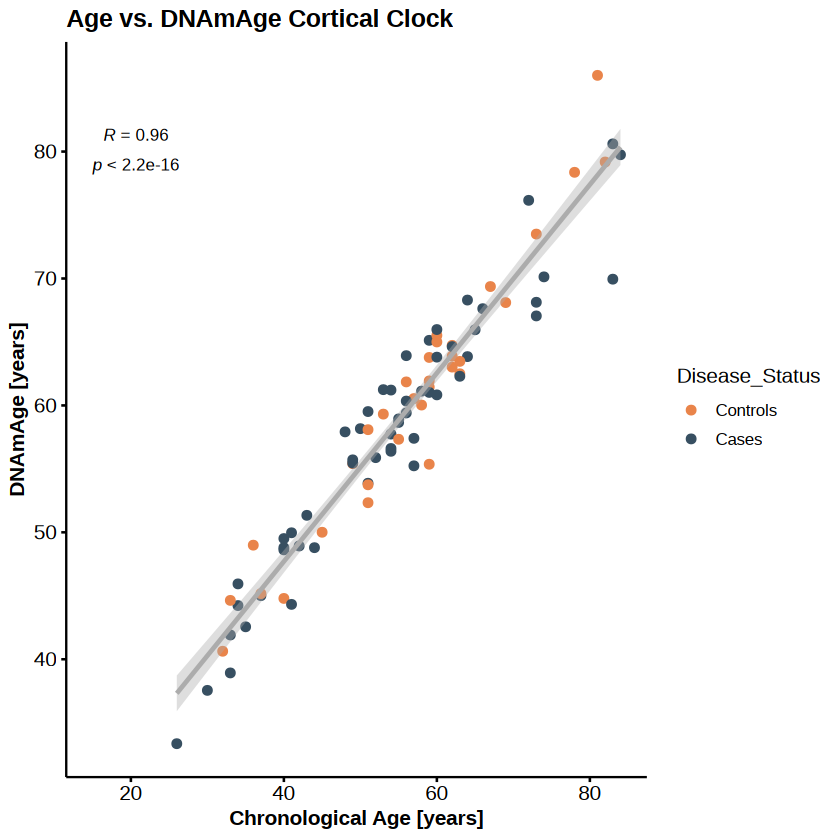

In [6]:
# correlation chronological with DNAmAge

ggscatter(methylation_clocks, x = "Age", y = "DNAmAgeCorticalClock_norm2", add = "reg.line", 
          conf.int = TRUE, cor.coef = TRUE, legend='right', cor.method = "pearson", 
          add.params = list(color = "#acacac", fill = "#acacac"), xlab = "Age [years]", 
          ylab = "DNAmAge [year]", title = "Age vs. DNAmAge Cortical Clock",  
          cor.coeff.args = list(label.y = 80, label.sep = "\n", size=3.5) ) + 
theme(axis.title = element_text(face="bold"), plot.title=element_text(face='bold'))

#ggsave('../figures/N86_Pearson_corr_Age_DNAmAgeCorticalClock_norm2.pdf', plot = last_plot(), height=4, width = 4)

ggscatter(methylation_clocks, x = "Age", y = "DNAmAgeCorticalClock_norm2", color= 'Disease_Status',
          palette = c("#e9844a", "#374f61"), add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, legend='right', cor.method = "pearson", 
          add.params = list(color = "#acacac", fill = "#acacac"),  xlab = "Chronological Age [years]", 
          ylab = "DNAmAge [years]", title = "Age vs. DNAmAge Cortical Clock",
          cor.coeff.args = list(label.y = 80, label.x= 15, label.sep = "\n", size=3.5) ) + 
theme(axis.title = element_text(face="bold"), plot.title=element_text(face='bold')) 

#ggsave('../figures/N86_Pearson_corr_Age_DNAmAgeCorticalClock_norm2_Case_Ctrl_colour.pdf', plot = last_plot(), height=4, width = 5)

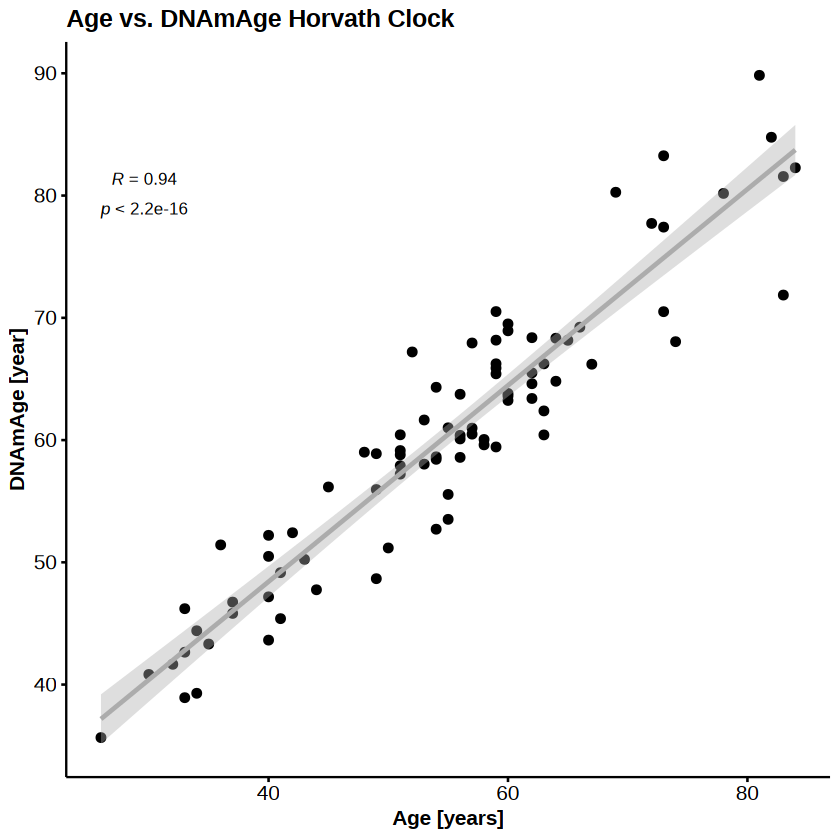

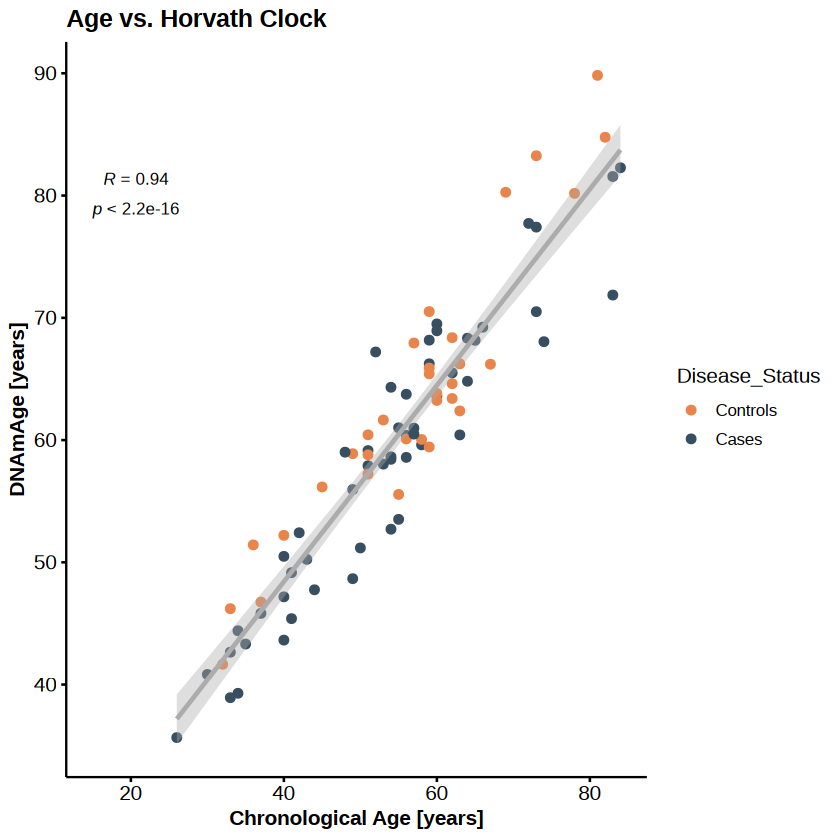

In [7]:
ggscatter(methylation_clocks, x = "Age", y = "DNAmAgeHorvath_norm1", add = "reg.line", 
          conf.int = TRUE, cor.coef = TRUE, legend='right', cor.method = "pearson", 
          add.params = list(color = "#acacac", fill = "#acacac"), xlab = "Age [years]", 
          ylab = "DNAmAge [year]", title = "Age vs. DNAmAge Horvath Clock",  
          cor.coeff.args = list(label.y = 80, label.sep = "\n", size=3.5) ) + 
theme(axis.title = element_text(face="bold"),plot.title=element_text(face='bold'))

#ggsave('../figures/N86_Pearson_corr_Age_DNAmAgeHorvath_norm1.pdf', plot = last_plot(), height=4, width = 4)

ggscatter(methylation_clocks, x = "Age", y = "DNAmAgeHorvath_norm1", color= 'Disease_Status',
          palette = c("#e9844a", "#374f61"), add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, legend='right', cor.method = "pearson", 
          add.params = list(color = "#acacac", fill = "#acacac"),  xlab = "Chronological Age [years]", 
          ylab = "DNAmAge [years]", title = "Age vs. Horvath Clock",
          cor.coeff.args = list(label.y = 80, label.x= 15, label.sep = "\n", size=3.5) ) + 
theme(axis.title = element_text(face="bold"), plot.title=element_text(face='bold')) 

#ggsave('../figures/N86_Pearson_corr_Age_DNAmAgeHorvath_norm1_Case_Ctrl_colour.pdf', plot = last_plot(), height=4, width = 5)

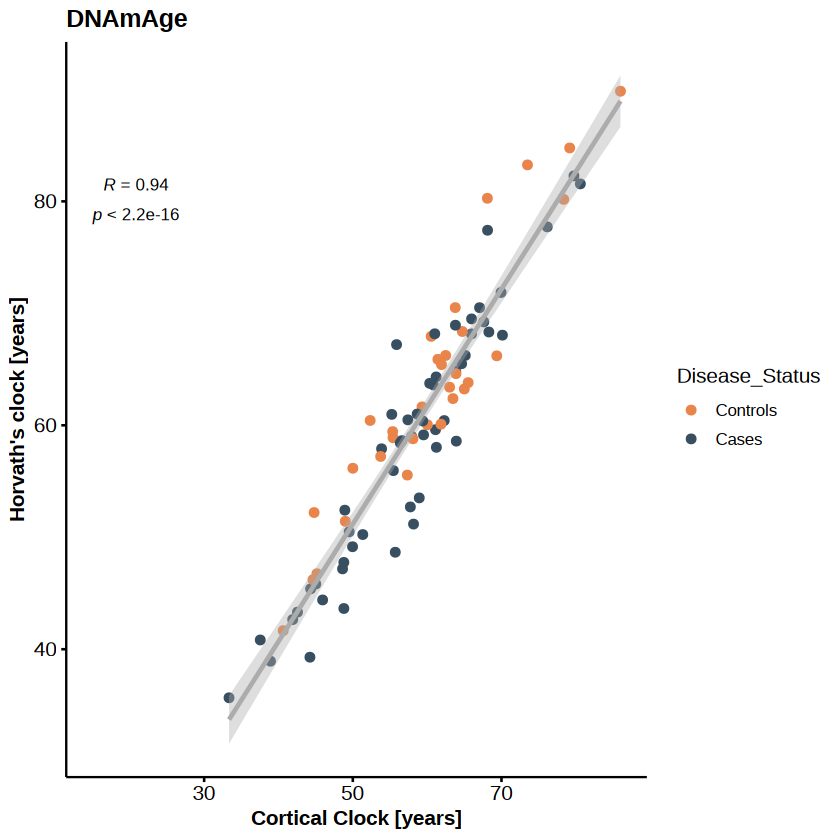

In [8]:
# correlation CorticalClock with Horvath's clock (DNAmAge)
ggscatter(methylation_clocks, x = "DNAmAgeCorticalClock_norm2", y = "DNAmAgeHorvath_norm1", color= 'Disease_Status',
          palette = c("#e9844a", "#374f61"), add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, legend='right', cor.method = "pearson", 
          add.params = list(color = "#acacac", fill = "#acacac"),  xlab = "Cortical Clock [years]", 
          ylab = "Horvath's clock [years]", title = "DNAmAge",
          cor.coeff.args = list(label.y = 80, label.x= 15, label.sep = "\n", size=3.5) ) + 
theme(axis.title = element_text(face="bold"), plot.title=element_text(face='bold')) 

#ggsave('../figures/N86_Pearson_corr_DNAmAgeCorticalClock_norm2_DNAmAgeHorvath_norm1_Case_Ctrl_colour.pdf', plot = last_plot(), height=4, width = 5)

# Epigenetic age acceleration

## Supplementary Table 14

In [9]:
# removing Unknown smoker status = NA
methylation_clocks %>% group_by(Smoking_status) %>% count() # 7 with unknown smoking status
methylation_clocks$Smoking_status <- factor(methylation_clocks$Smoking_status, levels=c("Never", 'Ex-smoker', 'Current'))

Smoking_status,n
<chr>,<int>
Current,37
Ex-smoker,13
Never,29
NA,7


In [10]:
# Multiple linear regression to examine Disease Status association with epigenetic age acceleration controlling for Sex, smoking_status, propNeuron
casecontrol_Horvath <- lm(AgeAccelHorvath_norm1_corrected ~ Sex + Smoking_status + propNeuron + Disease_Status,  data = methylation_clocks)
casecontrol_Cortical <- lm(AgeAccelCorticalClock_norm2_corrected ~ Sex + Smoking_status + propNeuron + Disease_Status,  data = methylation_clocks)

In [11]:
summary(casecontrol_Horvath)


Call:
lm(formula = AgeAccelHorvath_norm1_corrected ~ Sex + Smoking_status + 
    propNeuron + Disease_Status, data = methylation_clocks)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3512 -2.3240 -0.0655  2.0668  9.1138 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)              3.23867    4.88663   0.663   0.5096  
SexM                     0.65956    0.96997   0.680   0.4987  
Smoking_statusEx-smoker -0.08804    1.32407  -0.066   0.9472  
Smoking_statusCurrent    0.77029    1.00617   0.766   0.4464  
propNeuron              -5.90446    9.79906  -0.603   0.5487  
Disease_StatusCases     -2.05963    0.93008  -2.214   0.0299 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.765 on 73 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.08628,	Adjusted R-squared:  0.02369 
F-statistic: 1.379 on 5 and 73 DF,  p-value: 0.2423


In [12]:
summary(casecontrol_Cortical)


Call:
lm(formula = AgeAccelCorticalClock_norm2_corrected ~ Sex + Smoking_status + 
    propNeuron + Disease_Status, data = methylation_clocks)

Residuals:
   Min     1Q Median     3Q    Max 
-8.919 -1.260 -0.043  1.766  5.184 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)              -0.8437     3.5680  -0.236    0.814
SexM                      0.4959     0.7082   0.700    0.486
Smoking_statusEx-smoker   0.2185     0.9668   0.226    0.822
Smoking_statusCurrent     0.1053     0.7347   0.143    0.886
propNeuron                0.9765     7.1549   0.136    0.892
Disease_StatusCases      -0.3397     0.6791  -0.500    0.618

Residual standard error: 2.749 on 73 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.01316,	Adjusted R-squared:  -0.05443 
F-statistic: 0.1947 on 5 and 73 DF,  p-value: 0.9636


In [13]:
# extract summary statistics of regression model (output strucutred as with sjPlot package)
#extract coefficients
lm_age_accel_Horvath <- as.data.frame(summary(casecontrol_Horvath)$coefficients)
lm_age_accel_Horvath <- rownames_to_column(lm_age_accel_Horvath, "Predictors")
lm_age_accel_Horvath$Estimate <- round(lm_age_accel_Horvath$Estimate, digits=3)
lm_age_accel_Horvath$`Std. Error` <- round(lm_age_accel_Horvath$`Std. Error`, digits=3)
lm_age_accel_Horvath$`t value` <- round(lm_age_accel_Horvath$`t value`, digits=3)
lm_age_accel_Horvath$`Pr(>|t|)` <- round(lm_age_accel_Horvath$`Pr(>|t|)`, digits=3)
colnames(lm_age_accel_Horvath)[which(names(lm_age_accel_Horvath) == 'Pr(>|t|)')] <- 'p-value'

In [14]:
# extract overall model statistics
lm_age_accel_Horvath[nrow(lm_age_accel_Horvath)+5,] <- NA
lm_age_accel_Horvath[7,1] <- 'Observations'
lm_age_accel_Horvath[7,2] <- length(methylation_clocks$Smoking_status[!is.na(methylation_clocks$Smoking_status)])
lm_age_accel_Horvath[8,1] <- 'R2/R2 adj.'
lm_age_accel_Horvath[8,2] <- paste0(round(summary(casecontrol_Horvath)$r.squared, digits=4), '/', round(summary(casecontrol_Horvath)$adj.r.squared, digits=4))
lm_age_accel_Horvath[9,1] <- 'F'
lm_age_accel_Horvath[9,2] <- round(summary(casecontrol_Horvath)$fstatistic[1], digits=3)
lm_age_accel_Horvath[10,1] <- 'DF'
lm_age_accel_Horvath[10,2] <- summary(casecontrol_Horvath)$fstatistic[3]
lm_age_accel_Horvath[11,1] <- 'p-value'


#define function to extract overall p-value of model
overall_p <- function(my_model) {
    f <- summary(my_model)$fstatistic
    p <- pf(f[1],f[2],f[3],lower.tail=F)
    attributes(p) <- NULL
    return(p)
}

#extract overall p-value of model
lm_age_accel_Horvath[11,2] <- round(overall_p(casecontrol_Horvath), digits=7)

In [15]:
lm_age_accel_Horvath

,Predictors,Estimate,Std. Error,t value,p-value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,(Intercept),3.239,4.887,0.663,0.510
2,SexM,0.66,0.970,0.680,0.499
3,Smoking_statusEx-smoker,-0.088,1.324,-0.066,0.947
4,Smoking_statusCurrent,0.77,1.006,0.766,0.446
5,propNeuron,-5.904,9.799,-0.603,0.549
6,Disease_StatusCases,-2.06,0.930,-2.214,0.030
7,Observations,79,NA,NA,NA
8,R2/R2 adj.,0.0863/0.0237,NA,NA,NA
9,F,1.379,NA,NA,NA


In [16]:
# extract summary statistics of regression model (output strucutred as with sjPlot package)
#extract coefficients
lm_age_accel_Cortical <- as.data.frame(summary(casecontrol_Cortical)$coefficients)
lm_age_accel_Cortical <- rownames_to_column(lm_age_accel_Cortical, "Predictors")
lm_age_accel_Cortical$Estimate <- round(lm_age_accel_Cortical$Estimate, digits=3)
lm_age_accel_Cortical$`Std. Error` <- round(lm_age_accel_Cortical$`Std. Error`, digits=3)
lm_age_accel_Cortical$`t value` <- round(lm_age_accel_Cortical$`t value`, digits=3)
lm_age_accel_Cortical$`Pr(>|t|)` <- round(lm_age_accel_Cortical$`Pr(>|t|)`, digits=3)
colnames(lm_age_accel_Cortical)[which(names(lm_age_accel_Cortical) == 'Pr(>|t|)')] <- 'p-value'

In [17]:
# extract overall model statistics
lm_age_accel_Cortical[nrow(lm_age_accel_Cortical)+5,] <- NA
lm_age_accel_Cortical[7,1] <- 'Observations'
lm_age_accel_Cortical[7,2] <- length(methylation_clocks$Smoking_status[!is.na(methylation_clocks$Smoking_status)])
lm_age_accel_Cortical[8,1] <- 'R2/R2 adj.'
lm_age_accel_Cortical[8,2] <- paste0(round(summary(casecontrol_Cortical)$r.squared, digits=4), '/', round(summary(casecontrol_Cortical)$adj.r.squared, digits=4))
lm_age_accel_Cortical[9,1] <- 'F'
lm_age_accel_Cortical[9,2] <- round(summary(casecontrol_Cortical)$fstatistic[1], digits=3)
lm_age_accel_Cortical[10,1] <- 'DF'
lm_age_accel_Cortical[10,2] <- summary(casecontrol_Cortical)$fstatistic[3]
lm_age_accel_Cortical[11,1] <- 'p-value'

#extract overall p-value of model
lm_age_accel_Cortical[11,2] <- round(overall_p(casecontrol_Cortical), digits=3)

In [18]:
lm_age_accel_Cortical

,Predictors,Estimate,Std. Error,t value,p-value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,(Intercept),-0.844,3.568,-0.236,0.814
2,SexM,0.496,0.708,0.700,0.486
3,Smoking_statusEx-smoker,0.219,0.967,0.226,0.822
4,Smoking_statusCurrent,0.105,0.735,0.143,0.886
5,propNeuron,0.976,7.155,0.136,0.892
6,Disease_StatusCases,-0.34,0.679,-0.500,0.618
7,Observations,79,NA,NA,NA
8,R2/R2 adj.,0.0132/-0.0544,NA,NA,NA
9,F,0.195,NA,NA,NA


In [19]:
# merge results of two clocks
# perform multiple testing correction since two clocks (Cortical and Horvath) were tested
merged_results <- rbind(lm_age_accel_Horvath, lm_age_accel_Cortical)

for (var in 1:length(lm_age_accel_Horvath$Predictors)){
    merged_results$p.adjust_FDR[var] <- p.adjust(c(merged_results[,'p-value'][var], merged_results[,'p-value'][var+11]), method='fdr')[1]
    merged_results$p.adjust_FDR[var+11] <- p.adjust(c(merged_results[,'p-value'][var], merged_results[,'p-value'][var+11]), method='fdr')[2]
}
merged_results

Predictors,Estimate,Std. Error,t value,p-value,p.adjust_FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.239,4.887,0.663,0.510,0.814
SexM,0.66,0.970,0.680,0.499,0.499
Smoking_statusEx-smoker,-0.088,1.324,-0.066,0.947,0.947
Smoking_statusCurrent,0.77,1.006,0.766,0.446,0.886
propNeuron,-5.904,9.799,-0.603,0.549,0.892
Disease_StatusCases,-2.06,0.930,-2.214,0.030,0.060
Observations,79,NA,NA,NA,NA
R2/R2 adj.,0.0863/0.0237,NA,NA,NA,NA
F,1.379,NA,NA,NA,NA


In [20]:
#split in two dataframes; one per epigenetic clock
lm_age_accel_Horvath <- merged_results[1:11,]
lm_age_accel_Cortical <- merged_results[12:22,]

In [21]:
library(writexl)
write_xlsx(lm_age_accel_Horvath, '../results/epigenetic_age/lm_Horvath_age_accel_all_model_stats.xlsx', col_names = TRUE)
write_xlsx(lm_age_accel_Cortical, '../results/epigenetic_age/lm_Cortical_age_accel_all_model_stats.xlsx', col_names = TRUE)

# SessionInfo

In [22]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /psycl/u/afroe/conda-envs/dreamlet_duplicated/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] writexl_1.4.2   ggpubr_0.6.0    vroom_1.6.4     readxl_1.4.3   
 [5] lubridate_1.9.3 forcats_1.0.0   stringr_1.5.1   dplyr_1.1.4    
 [9] purrr_1.0.2     readr_2.1.4     tidyr_1.3.0     tibble_3.2.1   
[13]